In [3]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

State of Data Collection

In [4]:

transform_mnist = transforms.Compose([
    transforms.ToTensor(),
])

transform_cifar = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
])

mnist_train = datasets.MNIST(root='data', train=True, download=True, transform=transform_mnist)
#mnist_test = datasets.MNIST(root='data', train=False, download=True, transform=transform_mnist)
cifar_train = datasets.CIFAR10(root='data', train=True, download=True, transform=transform_cifar)

#10k test setine ayrılıyor. olmazsa ConcatDataset ile birleştirilebilir. bu durumda train = False da yapılmalı
print(len(mnist_train), len(cifar_train))


Files already downloaded and verified
60000 50000


Exploratory Data Analysis (EDA)

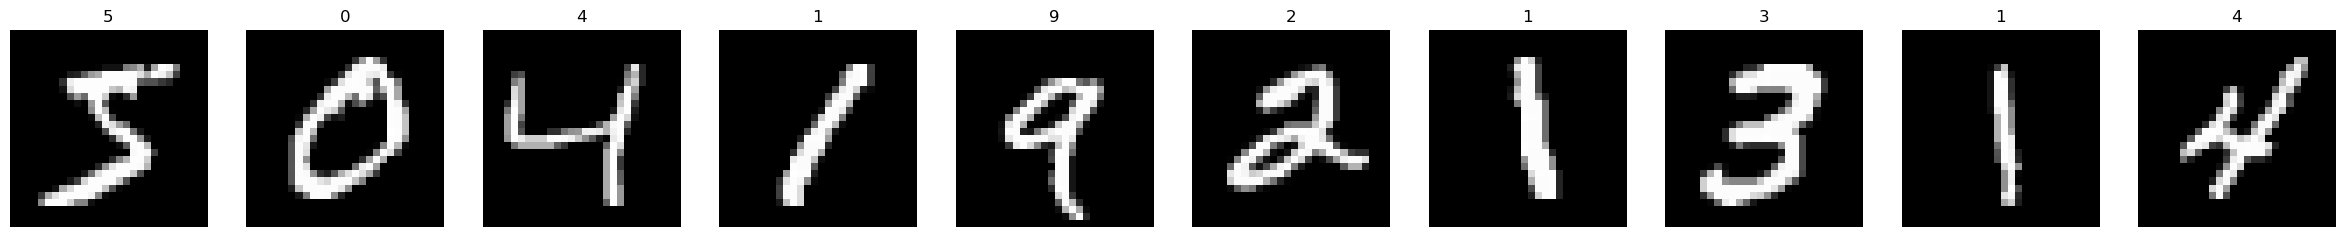

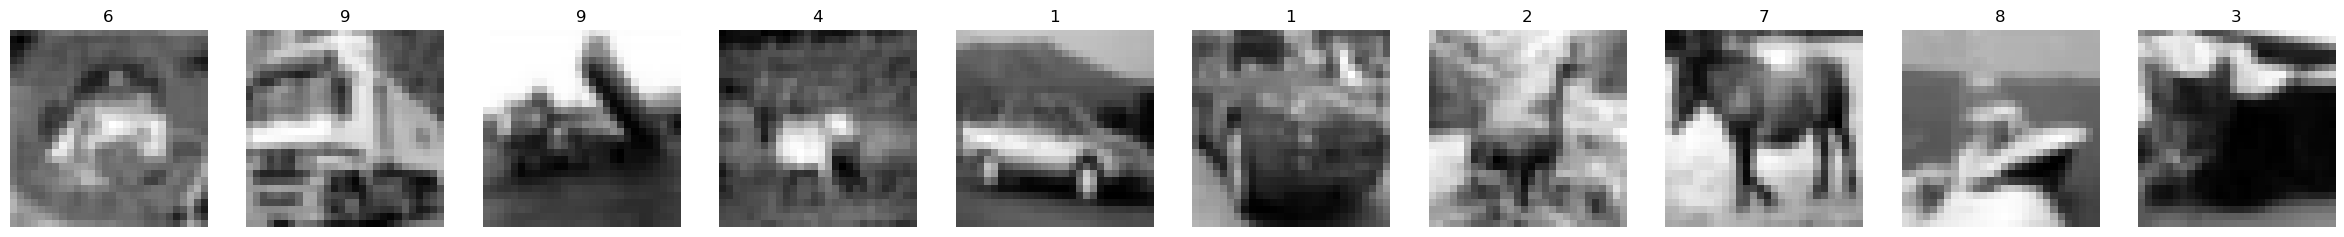

In [5]:
def show_samples(dataset, n=10):
    fig, axes = plt.subplots(1, n, figsize=(30, 15))
    for i in range(n):
        img, label = dataset[i]
        axes[i].imshow(img.squeeze(), cmap='gray')
        axes[i].set_title(label)
        axes[i].axis('off')
    plt.show()

show_samples(mnist_train)
show_samples(cifar_train)

Class Distribution

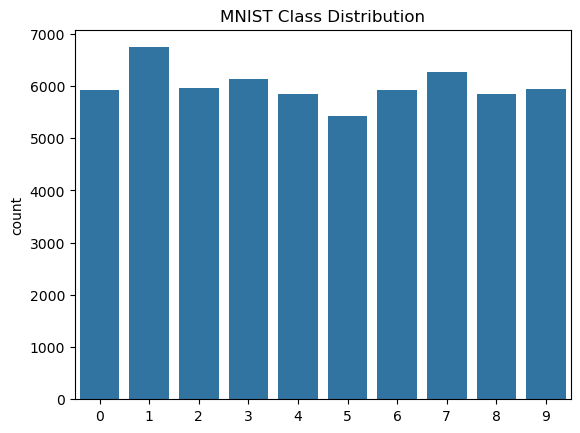

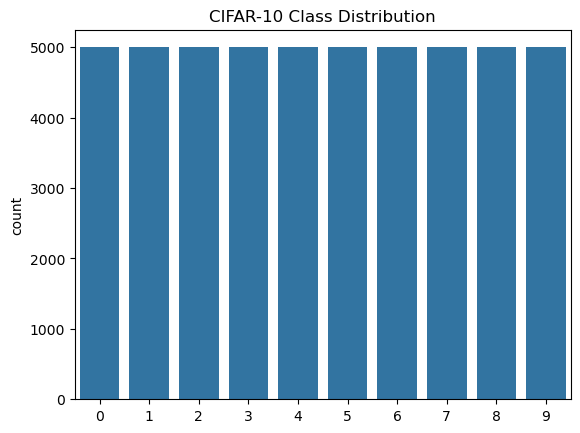

In [6]:
mnist_labels = [label for _, label in mnist_train]
cifar_labels = [label for _, label in cifar_train]

sns.countplot(x=mnist_labels)
plt.title("MNIST Class Distribution")
plt.show()

sns.countplot(x=cifar_labels)
plt.title("CIFAR-10 Class Distribution")
plt.show()

Piksel İstatistikleri

In [7]:
#ortalama ve standart sapma hesaplama
def dataset_stats(dataset):
    loader = torch.utils.data.DataLoader(dataset, batch_size=1000)
    mean, std = 0, 0
    for images, _ in loader:
        mean += images.mean()
        std += images.std()
    mean /= len(loader)
    std /= len(loader)
    return mean.item(), std.item()

mnist_mean, mnist_std = dataset_stats(mnist_train)
cifar_mean, cifar_std = dataset_stats(cifar_train)
print("MNIST mean/std:", mnist_mean, mnist_std)
print("CIFAR mean/std:", cifar_mean, cifar_std)

MNIST mean/std: 0.13066048920154572 0.30800729990005493
CIFAR mean/std: 0.48107749223709106 0.23170432448387146


PCA veya t-SNE Görselleştirmesi

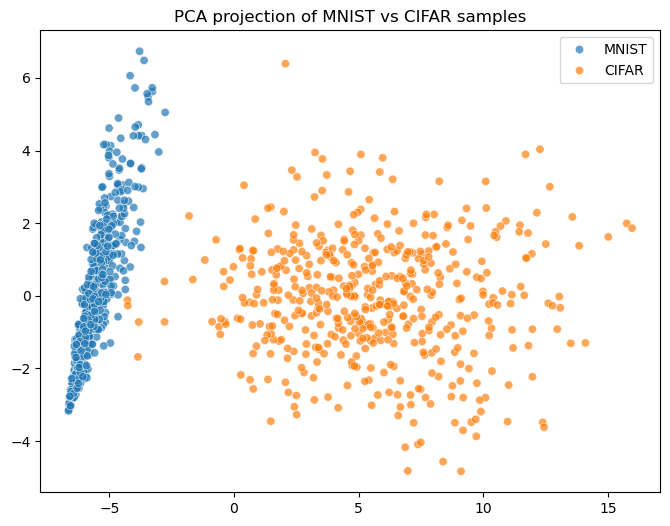

In [8]:
def flatten_images(dataset, n=500):
    imgs, labels = [], []
    for i in range(n):
        img, label = dataset[i]
        imgs.append(img.view(-1).numpy())
        labels.append(label)
    return np.array(imgs), np.array(labels)

mnist_imgs, mnist_labels = flatten_images(mnist_train)
cifar_imgs, cifar_labels = flatten_images(cifar_train)

combined_imgs = np.concatenate([mnist_imgs, cifar_imgs])
combined_labels = np.concatenate([["MNIST"]*len(mnist_labels), ["CIFAR"]*len(cifar_labels)])

pca = PCA(n_components=2)
reduced = pca.fit_transform(combined_imgs)

plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=combined_labels, alpha=0.7)
plt.title("PCA projection of MNIST vs CIFAR samples")
plt.show()

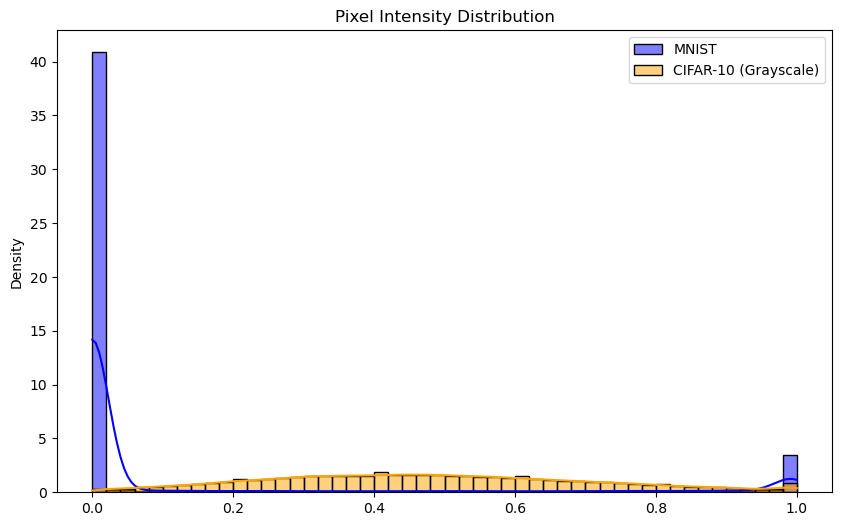

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(mnist_imgs.flatten(), color='blue', label='MNIST', kde=True, stat="density", bins=50)
sns.histplot(cifar_imgs.flatten(), color='orange', label='CIFAR-10 (Grayscale)', kde=True, stat="density", bins=50)
plt.legend()
plt.title('Pixel Intensity Distribution')
plt.show()

Domain Difference Measure

In [10]:
from scipy.stats import entropy

def image_entropy(img):
    hist, _ = np.histogram(img.numpy().flatten(), bins=256, range=(0,1))
    hist = hist / np.sum(hist)
    return entropy(hist)

print("MNIST image entropy (avg):", np.mean([image_entropy(mnist_train[i][0]) for i in range(1000)]))
print("CIFAR10 image entropy (avg):", np.mean([image_entropy(cifar_train[i][0]) for i in range(1000)]))


MNIST image entropy (avg): 1.1138957505079998
CIFAR10 image entropy (avg): 4.77149388776275
